---
# <font color='blue'>Trabajo de investigación Doctorado UAI</font>
---

**Alumno:** Pablo Negro - Gonzalo Zabala - Néstor Balich


# <font color='blue'>¿Qué es Sklearn SVM?</font>


¿Qué es Sklearn SVM?

Las clases sklearn. svm. ... NuSVC permiten crear modelos SVM de clasificación empleando kernel lineal, polinomial, radial o sigmoide. La diferencia es que SVC controla la regularización a través del hiperparámetro C , mientras que NuSVC lo hace con el número máximo de vectores soporte permitidos.

Scikit-learn implementa Support Vector Machines para escenarios de clasificación en varias clases:

sklearn.svm.SVC
sklearn.svm.NuSVC
sklearn.svm.LinearSVC

SVC

SVC es la clase principal ofrecida por Scikit-learn. Está implementada sobre la librería libsvm y la función de coste viene determinada por el parámetro C que ya hemos visto. El parámetro kernel especifica el tipo de kernel a usar. Las implementaciones nativas son "linear", "poly", "rbf" y "sigmoid". También es posible usar kernels desarrollados a medida.

NuSVC

En lugar de utilizar el parámetro C, NuSVC utiliza el parámetro nu que controla el número de vectores de soporte.

LinearSVC

Semejante a SVC con el parámetro kernel="linear" (único kernel soportado). En lugar de estar implementado con libsvm, lo está con liblinear lo que supone más flexibilidad en la asignación de penalizaciones y funciones de coste. Según la documentación de Scikit-learn, esta implementación debería ofrecer mejor rendimiento que SVC cuando se trabaja con gran número de muestras.

ref: 
https://www.cienciadedatos.net/documentos/py25-text-mining-python.html

# <font color='blue'>Funciones</font>

In [7]:
def eval_and_print_metrics(clf, X_train, y_train, X_test, y_test):
    print("Number of training samples:", len(X_train))
    print("Unlabeled samples in training set:", sum(1 for x in y_train if x == -1))
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(
        "F1 score on test set: %0.3f"
        % f1_score(y_test, y_pred, average="binary")
    )
    print("Accuracy: ", accuracy_score(y_test, y_pred) )
    print("Precision: ", precision_score(y_test, y_pred, average="binary"))
    print("Recall: ", recall_score(y_test, y_pred, average="binary"))
    print("-" * 10)
    print()
    
from sklearn.metrics import confusion_matrix
def matriz_confusion(train, pred,title= "Matriz de confusión"):
    import seaborn as sns
    import matplotlib.pyplot as plt 
    cm = confusion_matrix(train, pred)

    print("\n")
    # plt.figure(figsize=(10,6))  
    plt.rcParams.update({'font.size': 16})

    fig, ax = plt.subplots(figsize=(8, 4))

    # ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, fmt='g'); #annot=True to annotate cells

   
    # labels, title and ticks
    ax.set_xlabel('Predicted');
    ax.set_ylabel('Actual'); 

    ax.set_title(f'Confusion Matrix {title}'); 
    ax.xaxis.set_ticklabels([0, 1]); ax.yaxis.set_ticklabels([0, 1]);
    fig.tight_layout()

from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score,accuracy_score
def metricas_modelo(Xtrain, Ytrain,train,pred, title="Metricas del modelo",view=0):
    matriz = confusion_matrix(train,pred )
    exactitud = round(100*accuracy_score(train, pred),2)
    precision = round(100*precision_score(train,pred),2)
    sensibilidad = round(100*recall_score(train, pred),2)
    puntaje = round(100*f1_score(train, pred),2)
    error_clasificacion = round(100*(train != pred).mean(),2)
 

    if view == 0 or view == 1:
        print ("\n ********** ",title ," *************")
        print("\nNumber of training samples:", len(Xtrain))
        print("Unlabeled samples in training set:", sum(1 for x in Ytrain if x == -1))
        
        print("\nNumber of test samples:", len(train))
        print("Unlabeled samples in training set:", sum(1 for x in pred if x == -1))
        print(f"\nClassifications true: {(train == pred).sum()}")
        print(f"Classifications false: {(train != pred).sum()}")
        print(f"Classifications error: {error_clasificacion}%")
        print(f"\nF1 score (Puntaje)   : {puntaje}%")
        print(f"Accuracy (Exactitud) : {exactitud}%")
        print(f"Precision (Precision): {precision}%")
        print(f"Recall (Sensibilidad): {sensibilidad}%")
        # print("Matrix confusion: \n", matriz)
    if view == 0 or view == 2:
        matriz_confusion(train, pred,title)

def limpiar_tokenizar(texto):
    '''
    Esta función limpia y tokeniza el texto en palabras individuales.
    El orden en el que se va limpiando el texto no es arbitrario.
    El listado de signos de puntuación se ha obtenido de: print(string.punctuation)
    y re.escape(string.punctuation)
    '''
    
    # Se convierte todo el texto a minúsculas
    nuevo_texto = texto.lower()
    # Eliminación de páginas web (palabras que empiezan por "http")
    nuevo_texto = re.sub('http\S+', ' ', nuevo_texto)
    # Eliminación de signos de puntuación
    regex = '[\\!\\"\\#\\$\\%\\&\\\'\\(\\)\\*\\+\\,\\-\\.\\/\\:\\;\\<\\=\\>\\?\\@\\[\\\\\\]\\^_\\`\\{\\|\\}\\~]'
    nuevo_texto = re.sub(regex , ' ', nuevo_texto)
    # Eliminación de números
    nuevo_texto = re.sub("\d+", ' ', nuevo_texto)
    # Eliminación de espacios en blanco múltiples
    nuevo_texto = re.sub("\\s+", ' ', nuevo_texto)
    # Tokenización por palabras individuales
    nuevo_texto = nuevo_texto.split(sep = ' ')
    # Eliminación de tokens con una longitud < 2
    nuevo_texto = [token for token in nuevo_texto if len(token) > 1]
    
    return(nuevo_texto)

import re
def get_only_chars(line):
    clean_line = ""

    line = line.replace("’", "")
    line = line.replace("'", "")
    line = line.replace("-", " ") #replace hyphens with spaces
    line = line.replace("\t", " ")
    line = line.replace("\n", " ")
    line = line.lower()

    for char in line:
        if char in 'qwertyuiopasdfghjklzxcvbnm ':
            clean_line += char
        else:
            clean_line += ' '

    clean_line = re.sub(' +',' ',clean_line) #delete extra spaces
    if clean_line[0] == ' ':
        clean_line = clean_line[1:]
    return clean_line

# <font color='blue'>Lectura de los CSV</font>

In [6]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import string
import re
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')
# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
#style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
import pandas as pd
url = "https://raw.githubusercontent.com/NestorBalich/IA-ML/main/dfscopus.csv"
data_original = pd.read_csv(url, encoding='latin-1', sep=',')

url ="https://raw.githubusercontent.com/NestorBalich/IA-ML/main/df1_lemati_norm.csv"
df1_lemati_norm= pd.read_csv(url, encoding='latin-1', sep=',')

url ="https://raw.githubusercontent.com/NestorBalich/IA-ML/main/df1_stemi_norm.csv"
df1_stemi_norm = pd.read_csv(url, encoding='latin-1', sep=',')

url ="https://raw.githubusercontent.com/NestorBalich/IA-ML/main/df1_cluster_lemati.csv"
cluster_lemati= pd.read_csv(url, encoding='latin-1', sep=',')

url ="https://raw.githubusercontent.com/NestorBalich/IA-ML/main/df1_cluster_stemi.csv"
cluster_stemi = pd.read_csv(url, encoding='latin-1', sep=',')


In [5]:
import string
import collections
 
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from pprint import pprint
 
def process_text(text, stem=True):
    """ Tokenize text and stem words removing punctuation """
    #text = text.translate(None, string.punctuation)
    tokens = word_tokenize(text)
 
    if stem:
        stemmer = PorterStemmer()
        tokens = [stemmer.stem(t) for t in tokens]
 
    return tokens
 
 
def cluster_texts(texts, clusters=3):
    """ Transform texts to Tf-Idf coordinates and cluster texts using K-Means """
    vectorizer = TfidfVectorizer(tokenizer=process_text,
                                 stop_words=stopwords.words('english'),
                                 max_df=0.5,
                                 min_df=0.1,
                                 lowercase=True)
 
    tfidf_model = vectorizer.fit_transform(texts)
    km_model = KMeans(n_clusters=clusters, random_state=42)
    km_model.fit(tfidf_model)
 
    clustering = collections.defaultdict(list)
 
    for idx, label in enumerate(km_model.labels_):
        clustering[label].append(idx)
 
    return clustering

# <font color='blue'>Separación de datos de entrenamiento y testeo</font>

In [8]:
# trabajaremos sobre los mismos papers originales sin clusterización como linea base,
#trae todos los datos de data_original cuyo doi coincide con cluster_estemi['doi']
churn_df = data_original.merge(cluster_stemi['doi'], how='inner')

# extraemos proporsion igual balanceando manualmente
train_df =pd.concat([churn_df[churn_df['include?']=="SI"][0:30],churn_df[churn_df['include?']=="NO"][0:30]], axis=0 )


dsEntrenamiento=pd.concat([cluster_stemi[cluster_stemi['include?']==1][0:30],cluster_stemi[cluster_stemi['include?']==0][0:30]], axis=0)
dfSubset=dsEntrenamiento[["text_to_proc", "include?"]]

dfUnseen = cluster_stemi[~cluster_stemi.index.isin(dsEntrenamiento.index)]

In [9]:
#merificamos propociones 
print(dfSubset.shape)
dfSubset.groupby("include?")["include?"].count()

(60, 2)


include?
0    30
1    30
Name: include?, dtype: int64

In [10]:
print(dfUnseen.shape)
dfUnseen.groupby("include?")["include?"].count()

(146, 11)


include?
0    91
1    55
Name: include?, dtype: int64

Es importante verificar que la proporción de cada grupo es similar en el set de entrenamiento y en el de test.

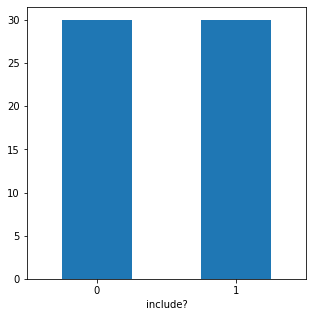

In [11]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,5))
dfSubset.groupby('include?')['include?'].count().plot.bar(ylim=0)
plt.xticks(rotation=0)
plt.show()

# <font color='blue'>Entendiendo los datos</font>



## <font color='blue'>Limpieza y tokenizado </font>


In [12]:
# Se aplica la función de limpieza y tokenización a cada tweet
# ==============================================================================
dfSubset['texto_tokenizado'] = dfSubset['text_to_proc'].apply(lambda x: limpiar_tokenizar(x))
dfSubset[['text_to_proc', 'texto_tokenizado']].head()

,text_to_proc,texto_tokenizado
0,Burbaite R. lego nxt robotbas learn environ te...,"[burbaite, lego, nxt, robotbas, learn, environ..."
2,Horn M. tangibl interact learn case hybrid app...,"[horn, tangibl, interact, learn, case, hybrid,..."
7,Kwon D. algorithm brick tangibl robot program ...,"[kwon, algorithm, brick, tangibl, robot, progr..."
12,Mason R. mindstorm robot applic cognit load th...,"[mason, mindstorm, robot, applic, cognit, load..."
13,Touretzky D. robot comput scientist big idea...,"[touretzky, robot, comput, scientist, big, ide..."


In [13]:
# Unnest de la columna texto_tokenizado
# ==============================================================================
dfSubset_tidy = dfSubset.explode(column='texto_tokenizado')
dfSubset_tidy = dfSubset_tidy.drop(columns='text_to_proc')
dfSubset_tidy = dfSubset_tidy.rename(columns={'texto_tokenizado':'token'})
dfSubset_tidy

,include?,token
0,1,burbaite
0,1,lego
0,1,nxt
0,1,robotbas
0,1,learn
...,...,...
43,0,practice
43,0,of
43,0,logic
43,0,programming


## <font color='blue'>Palabras totales por include</font>

In [14]:
# Palabras totales utilizadas por cada include?
# ==============================================================================
print('--------------------------')
print('Palabras totales por include?')
print('--------------------------')
dfSubset_tidy.groupby(by='include?')['token'].count()

--------------------------
Palabras totales por include?
--------------------------


include?
0    3823
1    3369
Name: token, dtype: int64

## <font color='blue'>Palabras distintas por include</font>

In [15]:
# Palabras distintas utilizadas por cada include?
# ==============================================================================
print('----------------------------')
print('Palabras distintas por include?')
print('----------------------------')
dfSubset_tidy.groupby(by='include?')['token'].nunique()

----------------------------
Palabras distintas por include?
----------------------------


include?
0    1322
1    1028
Name: token, dtype: int64

## <font color='blue'>Top 5 palabras más utilizadas por cada include</font>

In [16]:
# Top 5 palabras más utilizadas por cada include?
# ==============================================================================
dfSubset_tidy.groupby(['include?','token'])['token'] \
 .count() \
 .reset_index(name='count') \
 .groupby('include?') \
 .apply(lambda x: x.sort_values('count', ascending=False).head(5))

include?    token  count
include?                               
0        1152         0   system     58
         937          0  program     55
         1133         0  student     53
         310          0  develop     47
         1250         0      use     45
1        2041         1  program    132
         2108         1    robot    124
         2300         1      use     56
         2194         1  student     53
         1843         1    learn     46

In [17]:
# Obtención de listado de stopwords del inglés
# ==============================================================================
stop_words = list(stopwords.words('english'))
# Se añade la stoprword: amp, ax, ex
# stop_words.extend(("amp", "xa", "xe"))
print(stop_words[:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [18]:
# Filtrado para excluir stopwords
# ==============================================================================
dfSubset_tidy = dfSubset_tidy[~(dfSubset_tidy["token"].isin(stop_words))]

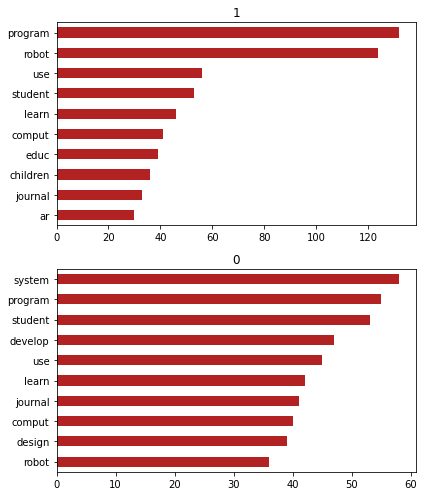

In [19]:
# Top 10 palabras por include
# ==============================================================================
fig, axs = plt.subplots(nrows=2, ncols=1,figsize=(6, 7))
for i, include in enumerate(dfSubset_tidy['include?'].unique()):
    df_temp = dfSubset_tidy[dfSubset_tidy['include?'] == include]
    counts  = df_temp['token'].value_counts(ascending=False).head(10)
    counts.plot(kind='barh', color='firebrick', ax=axs[i])
    axs[i].invert_yaxis()
    axs[i].set_title(include)

fig.tight_layout()

## <font color='blue'>Gráfico de correlación palabras / include</font>

In [20]:
# Pivotado de datos correlacion entre includes
# ==============================================================================
dfSubset_pivot = dfSubset_tidy.groupby(["include?","token"])["token"] \
                .agg(["count"]).reset_index() \
                .pivot(index = "token" , columns="include?", values= "count")
dfSubset_pivot.columns.name = None

Una forma de cuantificar la similitud entre los include es calculando la correlación en el uso de palabras.La idea es que, si dos categorias escriben de forma similar, tenderán a utilizar las mismas palabras y con frecuencias similares. La medida de similitud más utilizada al trabajar con texto es 1 - distancia coseno.

In [21]:
# Test de correlación (coseno) por el uso y frecuencia de palabras
# ==============================================================================
from scipy.spatial.distance import cosine

def similitud_coseno(a,b):
    distancia = cosine(a,b)
    return 1-distancia

dfSubset_pivot.corr(method=similitud_coseno)

,0,1
0,1.000000,0.766495
1,0.766495,1.000000


In [22]:
dfSubset_pivot[0]

token
abil               2.0
abl                2.0
aboard             NaN
abroad             NaN
abstract           3.0
                  ... 
zoo                NaN
zr                 NaN
zum                2.0
zunehmenden        1.0
zusammenfassung    1.0
Name: 0, Length: 1798, dtype: float64

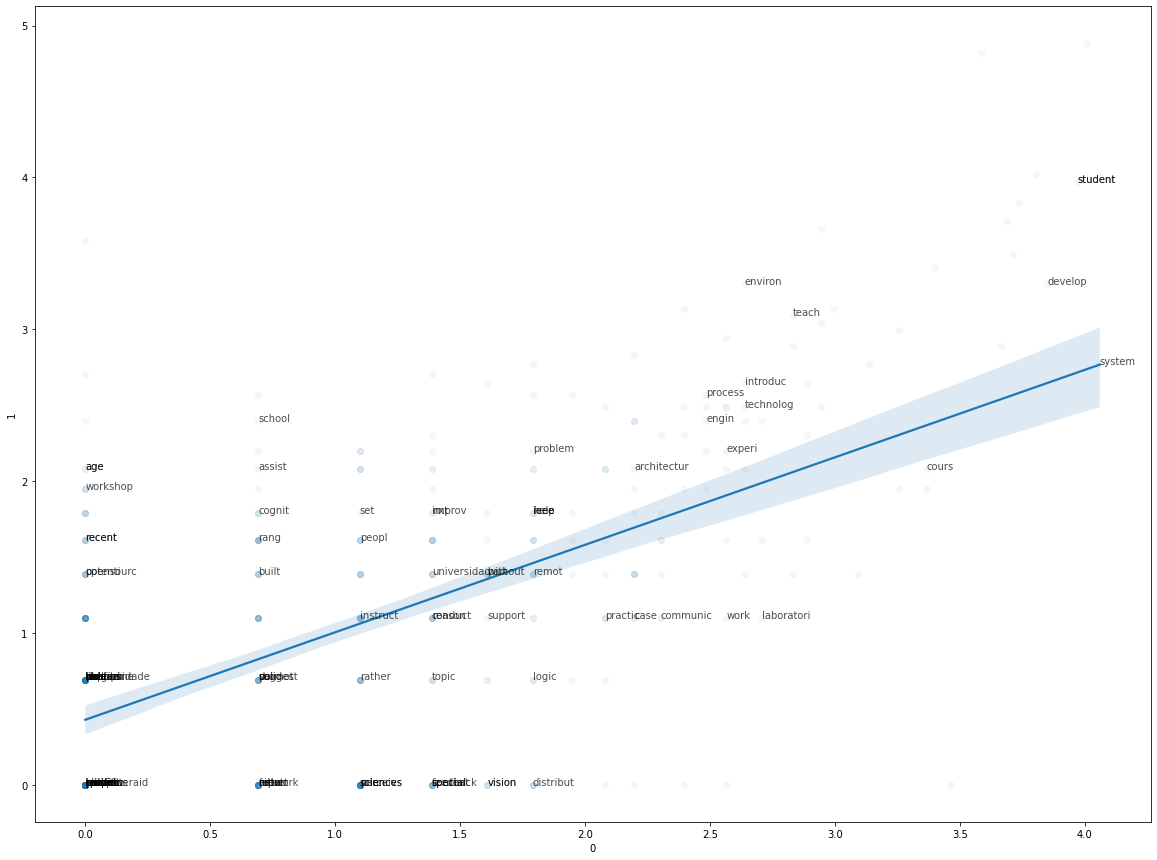

In [23]:
# Gráfico de correlación
# ==============================================================================
f, ax = plt.subplots(figsize=(20, 15))
temp = dfSubset_pivot.dropna()
sns.regplot(
    x  = np.log(temp[0]),
    y  = np.log(temp[1]),
    scatter_kws =  {'alpha': 0.05},
    ax = ax
)
for i in np.random.choice(range(temp.shape[0]), 100):
    ax.annotate(temp.index[i],
        xy=(np.log(temp[0][i]), np.log(temp[1][i])),
        alpha = 0.7
    )


## <font color='blue'>Palabras comunes entre los include</font>

In [24]:
# Número de palabras comunes
# ==============================================================================
include_0 = set(dfSubset_tidy[dfSubset_tidy['include?'] == 0]['token'])
include_1 = set(dfSubset_tidy[dfSubset_tidy['include?'] == 1]['token'])

print(f"Palabras comunes entre include=0 y include=1: {len(include_1.intersection(include_0))}")

Palabras comunes entre include=0 y include=1: 525


## <font color='blue'>Palabras diferenciadoras entre los include</font>

In [25]:
# Cálculo del log of odds ratio de cada palabra por include
# ==============================================================================
# Pivotaje y despivotaje
dfSubset_pivot = dfSubset_tidy.groupby(["include?","token"])["token"] \
                .agg(["count"]).reset_index() \
                .pivot(index = "token" , columns="include?", values= "count")

dfSubset_pivot = dfSubset_pivot.fillna(value=0)
dfSubset_pivot.columns.name = None

dfSubset_unpivot = dfSubset_pivot.melt(value_name='n', var_name='include?', ignore_index=False)
dfSubset_unpivot = dfSubset_unpivot.reset_index()

# Selección de los autores elonmusk y mayoredlee
dfSubset_unpivot = dfSubset_unpivot[dfSubset_unpivot["include?"].isin([0, 1])]

# Se añade el total de palabras de cada autor
dfSubset_unpivot = dfSubset_unpivot.merge(
                    dfSubset_tidy.groupby('include?')['token'].count().rename('N'),
                    how = 'left',
                    on  = 'include?'
                 )

# Cálculo de odds y log of odds de cada palabra
dfSubset_logOdds = dfSubset_unpivot.copy()
dfSubset_logOdds['odds'] = (dfSubset_logOdds.n + 1) / (dfSubset_logOdds.N + 1)
dfSubset_logOdds = dfSubset_logOdds[['token', 'include?', 'odds']] \
                    .pivot(index='token', columns='include?', values='odds')
dfSubset_logOdds.columns.name = None

dfSubset_logOdds['log_odds']     = np.log(dfSubset_logOdds[0]/dfSubset_logOdds[1])
dfSubset_logOdds['abs_log_odds'] = np.abs(dfSubset_logOdds.log_odds)

# Si el logaritmo de odds es mayor que cero, significa que es una palabra con
# mayor probabilidad de ser de Elon Musk. Esto es así porque el ratio sea ha
# calculado como elonmusk/mayoredlee.
dfSubset_logOdds['include_frecuente'] = np.where(dfSubset_logOdds.log_odds > 0,
                                              0,
                                              1
                                    )

In [26]:
print('-----------------------------------')
print('Top 10 palabras más diferenciadoras')
print('-----------------------------------')
dfSubset_logOdds.sort_values('abs_log_odds', ascending=False).head(150)

-----------------------------------
Top 10 palabras más diferenciadoras
-----------------------------------


,0,1,log_odds,abs_log_odds,include_frecuente
token,,,,,
tangibl,0.000266,0.008424,-3.454390,3.454390,1
children,0.000532,0.011131,-3.039956,3.039956,1
weld,0.005857,0.000301,2.968857,2.968857,0
collabor,0.000266,0.004212,-2.761243,2.761243,1
childhood,0.000266,0.003911,-2.687135,2.687135,1
...,...,...,...,...,...
compil,0.001065,0.000301,1.264109,1.264109,0
ni,0.001065,0.000301,1.264109,1.264109,0
author,0.001065,0.000301,1.264109,1.264109,0


## <font color='blue'>Top 100 palabras más características por include</font>

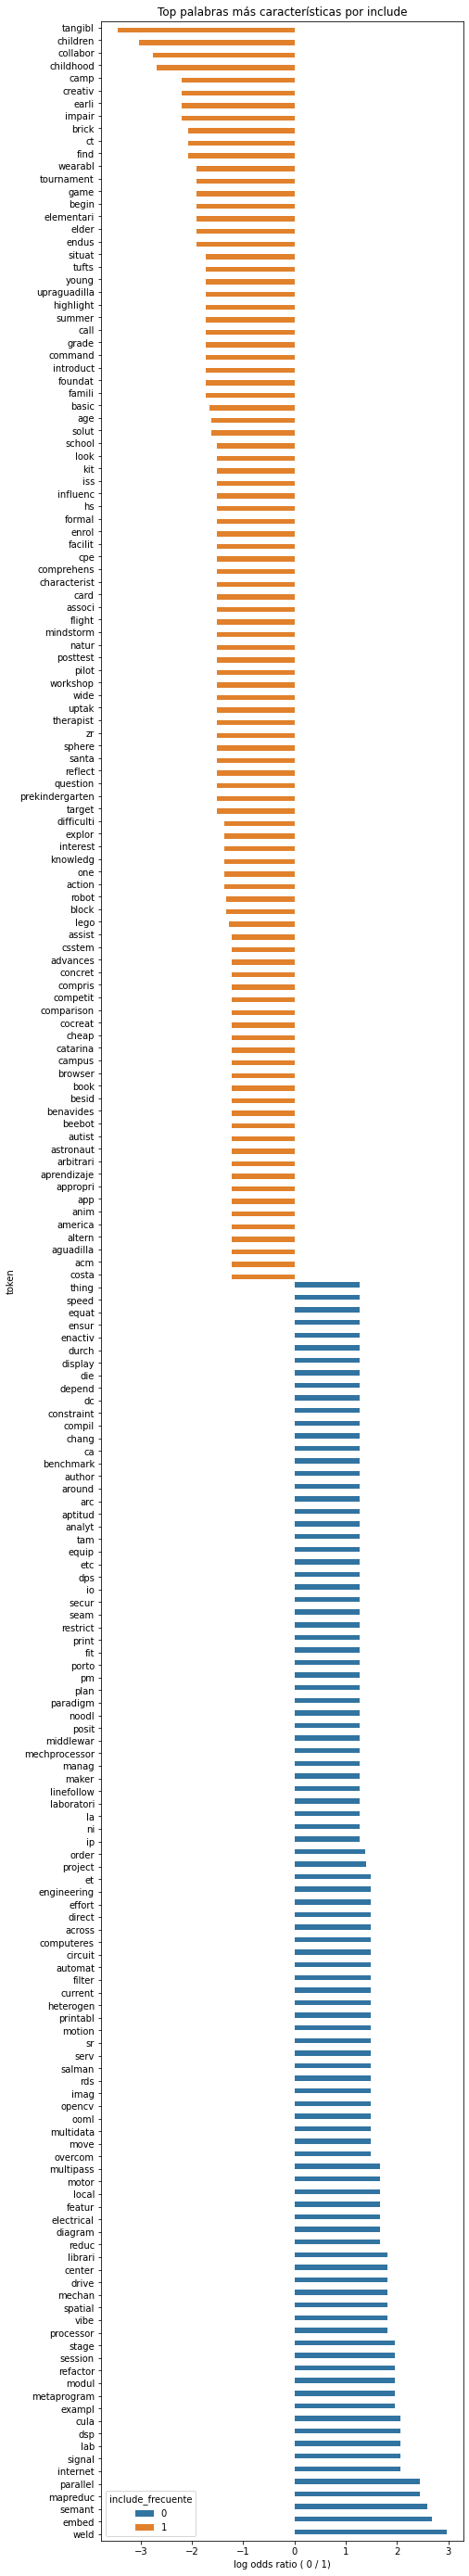

In [27]:
# Top 100 palabras más características por include
# ==============================================================================

top_ = dfSubset_logOdds[['log_odds', 'abs_log_odds', 'include_frecuente']] \
        .groupby('include_frecuente') \
        .apply(lambda x: x.nlargest(100, columns='abs_log_odds').reset_index()) \
        .reset_index(drop=True) \
        .sort_values('log_odds')

f, ax = plt.subplots(figsize=(7, 50))
sns.barplot(
    x    = 'log_odds',
    y    = 'token',
    hue  = 'include_frecuente',
    data = top_,
    ax   = ax
)
ax.set_title('Top palabras más características por include')
ax.set_xlabel('log odds ratio ( 0 / 1)');

# <font color='blue'>Aplicación del modelo</font>

## <font color='blue'>Estratificación de datos y vectorización TF-IDF</font>

In [28]:
# X_train, X_test, y_train, y_test = train_test_split(dfSubset['text_to_proc'], dfSubset['include?'], random_state = 42)

# Reparto train y test
# ==============================================================================
datos_X = dfSubset['text_to_proc']
datos_y = dfSubset['include?']

X_train, X_test, y_train, y_test = train_test_split(
    datos_X,
    datos_y,
    test_size = 0.2,
    random_state = 42,
    stratify=dfSubset['include?']
)

In [29]:
X_train.head

<bound method NDFrame.head of 2     Horn M. tangibl interact learn case hybrid app...
6     Mattmann C. middlewar platform provid mobil em...
11    RodrÃÂ­guez-ResÃÂ©ndiz J. approach motion co...
39    Strawhacker A. i want robot look food compar k...
12    Mason R. mindstorm robot applic cognit load th...
35    BilÃÂ©n S.G. softwaredefin radio new paradigm...
72    Chen G. assess elementari student comput think...
82    Athanasiou L. use robot introductori program e...
43    Blackmore C. logic program approach predict ef...
25    Cielniak G. integr mobil robot vision undergra...
64    Al-Halhouli A. lego mindstorm nxt elder visual...
74    Merkouris A. teach program secondari educ embo...
41    Stoppe J. analyz system design system analysi ...
38    Fuge M. mechprocessor help novic design printa...
37    Palumbo E. creation integr environ suppli lear...
5     Pinto M. local mobil robot use extend salman f...
19    Mysorewala M. projectbas strategi teach robot ...
0     Burbaite R. 

In [30]:
#porcentaje
value, counts = np.unique(y_train, return_counts=True)
print("y_train: ", dict(zip(value, 100 * counts / sum(counts))))
value, counts = np.unique(y_test, return_counts=True)
print("y_test: ",dict(zip(value, 100 * counts / sum(counts))))

print("y_train: ", y_test.shape)
print("y_test: ", y_test.shape)

y_train:  {0: 50.0, 1: 50.0}
y_test:  {0: 50.0, 1: 50.0}
y_train:  (12,)
y_test:  (12,)


## <font color='blue'>Vectorización TF-IDF</font>

In [31]:
stop_words = list(stopwords.words('english'))
# Se añade la stopword: amp, ax, ex
# stop_words.extend(("amp", "xa", "xe"))

In [32]:
# Creación de la matriz tf-idf
# ==============================================================================
tfidf_vectorizador = TfidfVectorizer(
                        tokenizer  = limpiar_tokenizar,
                        min_df     = 3,
                        stop_words = stop_words
                    )
tfidf_vectorizador.fit(X_train)

TfidfVectorizer(min_df=3,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function limpiar_tokenizar at 0x7f0ace030d40>)

In [33]:
tfidf_train = tfidf_vectorizador.transform(X_train)
tfidf_test  = tfidf_vectorizador.transform(X_test)

In [34]:
print(f" Número de tokens creados: {len(tfidf_vectorizador.get_feature_names())}")
print(tfidf_vectorizador.get_feature_names()[:10])

 Número de tokens creados: 361
['abstract', 'access', 'across', 'action', 'activ', 'adapt', 'addit', 'address', 'advantag', 'afford']


#<font color='blue'> Modelo SVM ( Máquinas de Vector Soporte) SVC</font>

**Máquinas de Vector Soporte (Vector Support Machines, SVMs)** es un algoritmo de clasificación y regresión desarrollado en la década de los 90, dentro del campo de la ciencia computacional. Aunque inicialmente se desarrolló como un método de clasificación binaria, su aplicación se ha extendido a problemas de clasificación múltiple y regresión. SVMs ha resultado ser uno de los mejores clasificadores para un amplio abanico de situaciones, por lo que se considera uno de los referentes dentro del ámbito de aprendizaje estadístico y machine learning.

En Scikit Learn pueden encontrarse tres implementaciones distintas del algoritmo Suport Vector Machine:

Las clases **sklearn.svm.SVC y sklearn.svm.NuSVC ** permiten crear modelos SVM de clasificación empleando kernel lineal, polinomial, radial o sigmoide. La diferencia es que SVC controla la regularización a través del hiperparámetro C, mientras que NuSVC lo hace con el número máximo de vectores soporte permitidos.

La clase **sklearn.svm.LinearSVC** permite ajustar modelos SVM con kernel lineal. Es similar a SVC cuando el parámetro kernel='linear', pero utiliza un algoritmo más rápido.


**¿Cuál es la diferencia entre SVC y SVM en scikit-learn?**
Son simplemente diferentes implementaciones del mismo algoritmo. El módulo SVM (SVC, NuSVC, etc.) es un contenedor de la biblioteca libsvm y admite diferentes núcleos, mientras que LinearSVCse basa en liblinear y solo admite un núcleo lineal. Entonces:


**SVC(kernel = 'linear')**
es en teoría "equivalente" a: **LinearSVC()**

Debido a que las implementaciones son diferentes en la práctica, obtendrá resultados diferentes, los más importantes son que LinearSVC solo admite un kernel lineal, es más rápido y puede escalar mucho mejor.

**K-means vs SVM**
K-means se utiliza cuando no conocemos las etiquetas de nuestras muestras de capacitación (aprendizaje no supervisado) y es un algorimo de agrupamiento, mientras que las SVM se utilizan para el aprendizaje supervisado y es un método de clasificación, en el que sabemos a qué clase pertenece cada muestra de capacitación.
La agrupación es una técnica de aprendizaje no supervisada y la clasificación es una técnica de aprendizaje supervisado.

ref: https://www.cienciadedatos.net/documentos/py25-text-mining-python.html
ref: https://www.cienciadedatos.net/documentos/py24-svm-python.html



# <font color='blue'>SVM SVC Linear</font>

In [93]:
# trabajaremos sobre los mismos papers originales sin clusterización como linea base,
#trae todos los datos de data_original cuyo doi coincide con cluster_estemi['doi']
churn_df = data_original.merge(cluster_stemi['doi'], how='inner')

# extraemos proporsion igual balanceando manualmente
train_df =pd.concat([churn_df[churn_df['include?']=="SI"][0:30],churn_df[churn_df['include?']=="NO"][0:30]], axis=0 )


dsEntrenamiento=pd.concat([cluster_stemi[cluster_stemi['include?']==1][0:30],cluster_stemi[cluster_stemi['include?']==0][0:30]], axis=0)
dfSubset=dsEntrenamiento[["text_to_proc", "include?"]]

dfUnseen = cluster_stemi[~cluster_stemi.index.isin(dsEntrenamiento.index)]

In [94]:
#merificamos propociones 
print(dfSubset.shape)
dfSubset.groupby("include?")["include?"].count()

(60, 2)


include?
0    30
1    30
Name: include?, dtype: int64

In [95]:
print(dfUnseen.shape)
dfUnseen.groupby("include?")["include?"].count()

(146, 11)


include?
0    91
1    55
Name: include?, dtype: int64

In [96]:
datos_X = dfSubset['text_to_proc']
datos_y = dfSubset['include?']

X_train, X_test, y_train, y_test = train_test_split(
    datos_X,
    datos_y,
    test_size = 0.2,
    random_state = 42,
    stratify=dfSubset['include?']
)

## <font color='blue'>Entrenamiento</font>

In [99]:
# 
# Entrenamiento del modelo SVM
# ==============================================================================
from sklearn import svm

tfidf_train = tfidf_vectorizador.transform(X_train)
tfidf_test  = tfidf_vectorizador.transform(X_test)

modelo_svm_lineal_SVC = svm.SVC(kernel= "linear", C = 1.0)
modelo_svm_lineal_SVC.fit(X=tfidf_train, y= y_train)

# modelo_svm_lineal_NuSVC = svm.NuSVC(cache_size=200, class_weight=None, coef0=0.0,
#       decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
#       max_iter=-1, nu=0.5, probability=False, random_state=None,
#       shrinking=True, tol=0.001, verbose=False)
# modelo_svm_lineal_NuSVC.fit(X=tfidf_train, y= y_train)

SVC(kernel='linear')

### <font color='blue'>Optimización con GridSearchCV</font>

In [100]:
from sklearn.model_selection import GridSearchCV
# Grid de hiperparámetros
# ==============================================================================
param_grid = {'C': np.logspace(-5, 3, 100)}

# Búsqueda por validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = svm.SVC(kernel= "linear"),
        param_grid = param_grid,
        scoring    = 'f1',
        n_jobs     = -1,
        cv         = 5, 
        verbose    = 0,
        return_train_score = True
      )

# Se asigna el resultado a _ para que no se imprima por pantalla
_ = grid.fit(X = tfidf_train, y = y_train)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)

,param_C,mean_test_score,std_test_score,mean_train_score,std_train_score
62,1.02353,0.817778,0.035556,0.994872,0.010256
61,0.849753,0.807778,0.044942,0.989994,0.012261
60,0.70548,0.807778,0.044942,0.989994,0.012261
59,0.585702,0.793232,0.055608,0.984866,0.012366
63,1.23285,0.791111,0.071111,0.994872,0.010256
...,...,...,...,...,...
30,0.00265609,0.530696,0.276218,0.725337,0.381529
29,0.00220513,0.530696,0.276218,0.725337,0.381529
28,0.00183074,0.530696,0.276218,0.725337,0.381529
27,0.00151991,0.530696,0.276218,0.725337,0.381529


In [101]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

modelo_final = grid.best_estimator_


----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'C': 1.0235310218990268} : 0.8177777777777779 f1


### <font color='blue'>Predicción</font>

In [102]:
predicciones_test = modelo_final.predict(X=tfidf_test)

### <font color='blue'>Métricas</font>

In [103]:
# Error predicciones test
# ==============================================================================
predicciones_test = modelo_final.predict(X=tfidf_test)

print("-------------")
print("Error de test")
print("-------------")

print(f"Número de clasificaciones erróneas de un total de {tfidf_test.shape[0]} " \
      f"clasificaciones: {(y_test != predicciones_test).sum()}"
)
print(f"% de error: {100*(y_test != predicciones_test).mean()}")

print("")
print("-------------------")
print("Matriz de confusión")
print("-------------------")
pd.DataFrame(confusion_matrix(y_true = y_test, y_pred= predicciones_test),
             columns= [0, 1],
             index = [0, 1])

-------------
Error de test
-------------
Número de clasificaciones erróneas de un total de 12 clasificaciones: 2
% de error: 16.666666666666664

-------------------
Matriz de confusión
-------------------


,0,1
0,4,2
1,0,6



 **********  modelo optimizado  *************

Number of training samples: 48
Unlabeled samples in training set: 0

Number of test samples: 12
Unlabeled samples in training set: 0

Classifications true: 10
Classifications false: 2
Classifications error: 16.67%

F1 score (Puntaje)   : 85.71%
Accuracy (Exactitud) : 83.33%
Precision (Precision): 75.0%
Recall (Sensibilidad): 100.0%




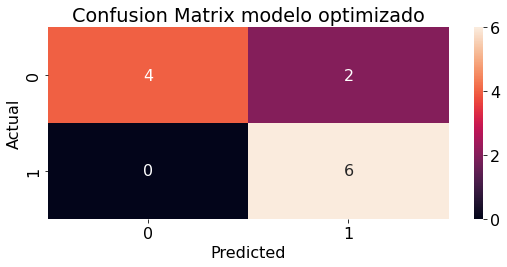

In [104]:
metricas_modelo(X_train, y_train,y_test,predicciones_test,"modelo optimizado",0)

## <font color='blue'>Testeo con unSeen</font>

In [105]:
print("Cantidad de columnas: ",len(dfUnseen.columns))
print("Cantidad de filas: ",len(dfUnseen))

Cantidad de columnas:  11
Cantidad de filas:  146


In [106]:
dfUnseen.groupby('include?').count()

,doi,subtype,creator,affilname,publicationName,aggregationType,proc_pubmed_id,proc_abstract,proc_title,text_to_proc
include?,,,,,,,,,,
0,91,91,91,91,91,91,91,90,91,91
1,55,55,55,54,55,55,55,55,55,55


### <font color='blue'>Lectura de datos y vectorización</font>

In [107]:
# Reparto train y test
# ==============================================================================
X_test = dfUnseen['text_to_proc']
y_test = dfUnseen['include?']

In [108]:
tfidf_train = tfidf_vectorizador.transform(X_test)
# tfidf_test  = tfidf_vectorizador.transform(X_test)

### <font color='blue'>Predicción</font>

In [109]:
predicciones_test = modelo_final.predict(X=tfidf_train)

### <font color='blue'>Métricas</font>


 **********  modelo optimizado  *************

Number of training samples: 48
Unlabeled samples in training set: 0

Number of test samples: 146
Unlabeled samples in training set: 0

Classifications true: 89
Classifications false: 57
Classifications error: 39.04%

F1 score (Puntaje)   : 59.57%
Accuracy (Exactitud) : 60.96%
Precision (Precision): 48.84%
Recall (Sensibilidad): 76.36%




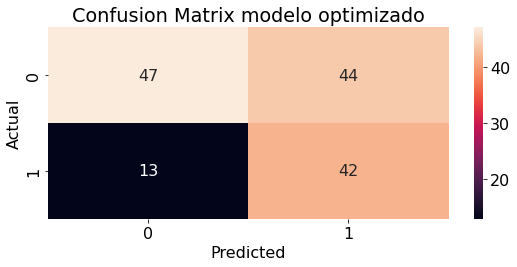

In [110]:
metricas_modelo(X_train, y_train,y_test,predicciones_test,"modelo optimizado",0)

In [84]:
matriz = confusion_matrix(y_test,predicciones_test)
leete = matriz[0][1] + matriz[1][1]
noleete = matriz[0][0]   + matriz[1][0] 
ahorro = noleete * 100 / (leete + noleete) 
print(f"Leete {leete} te salvaste de leer {noleete}")
print(f"Te ahorre de leer {ahorro} %")

Leete 86 te salvaste de leer 60
Te ahorre de leer 41.0958904109589 %
